# Linear regression

In [1]:
import pandas as pd
import numpy as np

humidity=pd.read_csv("humidity.csv")
#Converting the headers to lower case:
humidity.columns=humidity.columns.str.lower()
x=humidity[["resistance","temperature"]].copy()
y=humidity["relativehumidity"].copy()

In [2]:
x["intercept"]=1
x=x[["intercept","temperature","resistance"]]
x_t=x.T

In [3]:
#print(x_t)
#print(x)
B=np.linalg.inv(x_t@x)@x_t@y
B
#These valuses are B[0],B[1],B[2] respectively

0   -3.534940e+02
1    1.493976e+01
2   -2.908982e-16
dtype: float64

In [4]:
B.index=x.columns
predictions=x@B

In [5]:
predictions

0      20.000
1      20.124
2      20.248
3      20.372
4      20.496
        ...  
600    94.400
601    94.524
602    94.648
603    94.772
604    94.896
Length: 605, dtype: float64

In [6]:
#all_predictions=[]

preds=pd.Series(predictions)
combined=pd.concat([humidity["relativehumidity"],preds],axis=1)
#all_predictions.append(combined)
combined.columns=["actual","prediction"]

combined

,actual,prediction
0,20.000,20.000
1,20.124,20.124
2,20.248,20.248
3,20.372,20.372
4,20.496,20.496
...,...,...
600,94.400,94.400
601,94.524,94.524
602,94.648,94.648
603,94.772,94.772


In [7]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(combined["actual"],combined["prediction"])

1.673598266399705e-12

In [8]:
#calculting accuracy
from sklearn.metrics import accuracy_score
l=list(combined["actual"])
actual=[]
pred=[]
for i in l:
    i=int(i)
    actual.append(i)
m=list(combined["prediction"])
for i in m:
    i=int(i)
    pred.append(i)
accuracy = accuracy_score(actual,pred)
print(accuracy)

1.0


Confusion Matrix:
[[105   0   0   0]
 [  0 186   0   0]
 [  0   0 201   0]
 [  0   0   0 113]]


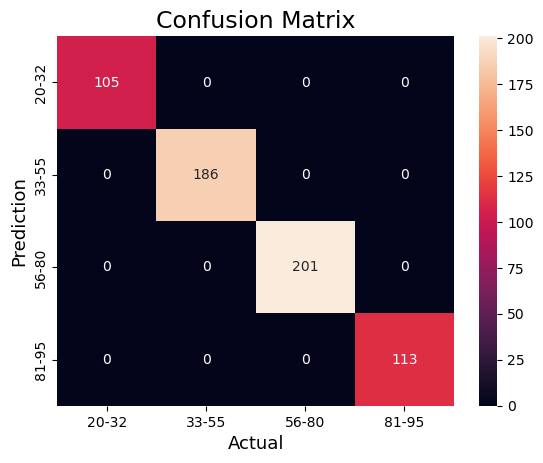

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix

true_labels=l
predicted_labels=m
# Convert decimal values to discrete classes (e.g., using thresholds)
thresholds = [20,33,56,81]
true_classes = np.digitize(true_labels, thresholds)
predicted_classes = np.digitize(predicted_labels, thresholds)

# Calculate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes, labels=[1, 2, 3, 4])

print("Confusion Matrix:")
print(cm)

class_labels=["20-32","33-55","56-80","81-95"]

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
